# Path Finding Problem

This problem is the path finding from Dublin to Istanbul with the BFS and DFS algorithm. The
datasets that are used in this problem are in the Dataset folder.


## Data Processing

Before implementing the BFS and DFS Algorithm, we need to do data processing from the datasets, so we can use it in the implementation section.

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#declare list of cities
cities = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw']
latlng = ['latitude', 'longitude']

#read csv dataset
position = pd.read_csv('.\Dataset\position.csv', index_col="City")
distance = pd.read_csv('.\Dataset\distance.csv', index_col="City")

Call the head of position and distance to know the five rows of the data

In [3]:
position.head()

,latitude,longitude
City,,
Barcelona,41.3888,2.1590
Belgrade,44.8040,20.4651
Berlin,52.5244,13.4105
Brussels,50.8505,4.3488
Bucharest,44.4323,26.1063


In [4]:
distance.head()

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Sofia,Stockholm,Vienna,Warsaw
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12


Find the position from latitude and longitude for all city in list 'cities' and map them  with the corresponding city in dictionary 'positions' (key : city, values : position)

In [5]:
positions = dict((city, (position.loc[city, 'longitude'], position.loc[city, 'latitude'])) for city in cities)
positions

{'Barcelona': (2.1590000000000003, 41.3888),
 'Belgrade': (20.4651, 44.803999999999995),
 'Berlin': (13.4105, 52.5244),
 'Brussels': (4.3488, 50.8505),
 'Bucharest': (26.1063, 44.4323),
 'Budapest': (19.0399, 47.498000000000005),
 'Copenhagen': (12.5655, 55.6759),
 'Dublin': (-6.2489, 53.3331),
 'Hamburg': (10.0153, 53.5753),
 'Istanbul': (28.9497, 41.0138),
 'Kiev': (30.5238, 50.4547),
 'London': (-0.1257, 51.5085),
 'Madrid': (-3.7026, 40.4165),
 'Milan': (12.1728, 45.5928),
 'Moscow': (37.6156, 55.7522),
 'Munich': (11.5755, 48.1374),
 'Paris': (2.3488, 48.8534),
 'Prague': (14.4208, 50.088),
 'Rome': (12.5113, 41.8919),
 'Saint Petersburg': (30.3141, 59.9386),
 'Sofia': (23.3241, 42.6975),
 'Stockholm': (18.0649, 59.3326),
 'Vienna': (16.3721, 48.2085),
 'Warsaw': (21.0118, 52.2298)}

Plot the dictionary position

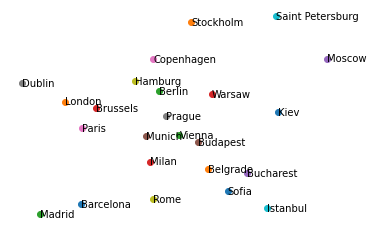

In [6]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

Find the distance in every one city position to another city position, and map them in dictionary distances

In [7]:
distances = dict(((s1,s2), distance.loc[s1, s2]) for s1 in positions for s2 in positions if s1!=s2)
distances

{('Barcelona', 'Belgrade'): 1528.13,
 ('Barcelona', 'Berlin'): 1497.61,
 ('Barcelona', 'Brussels'): 1062.89,
 ('Barcelona', 'Bucharest'): 1968.42,
 ('Barcelona', 'Budapest'): 1498.79,
 ('Barcelona', 'Copenhagen'): 1757.54,
 ('Barcelona', 'Dublin'): 1469.29,
 ('Barcelona', 'Hamburg'): 1471.78,
 ('Barcelona', 'Istanbul'): 2230.42,
 ('Barcelona', 'Kiev'): 2391.06,
 ('Barcelona', 'London'): 1137.67,
 ('Barcelona', 'Madrid'): 504.64,
 ('Barcelona', 'Milan'): 725.12,
 ('Barcelona', 'Moscow'): 3006.93,
 ('Barcelona', 'Munich'): 1054.55,
 ('Barcelona', 'Paris'): 831.59,
 ('Barcelona', 'Prague'): 1353.9,
 ('Barcelona', 'Rome'): 856.69,
 ('Barcelona', 'Saint Petersburg'): 2813.02,
 ('Barcelona', 'Sofia'): 1745.55,
 ('Barcelona', 'Stockholm'): 2276.51,
 ('Barcelona', 'Vienna'): 1347.43,
 ('Barcelona', 'Warsaw'): 1862.33,
 ('Belgrade', 'Barcelona'): 1528.13,
 ('Belgrade', 'Berlin'): 999.25,
 ('Belgrade', 'Brussels'): 1372.59,
 ('Belgrade', 'Bucharest'): 447.34,
 ('Belgrade', 'Budapest'): 316.41,
 

These distance values will be filtered to our custom problem. We designed our custom path like the graph below

## Problem

This problem is for seacrhing the sorthest path form Dublin to Istanbul, based this graph path:
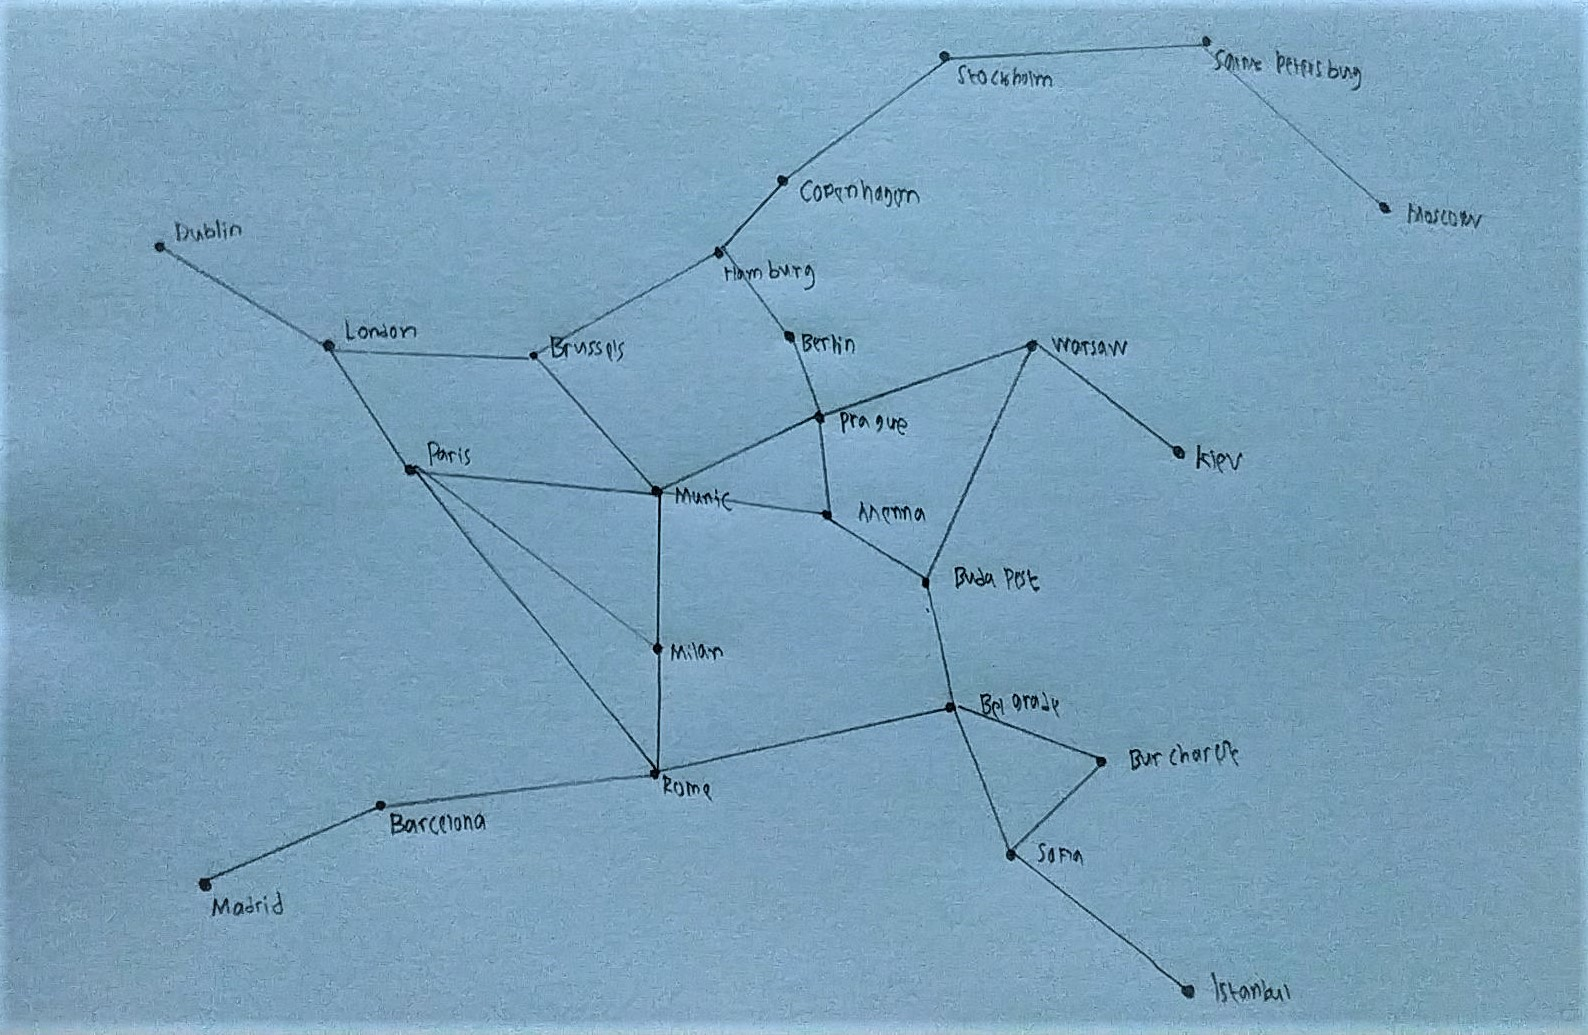

distance_filter is a variable to keep the filtered data from the previous 'distance' data so that only the distance between two neighboring nodes is stored (not the distance from one to all nodes).

In [8]:
distance_filter = {('Belgrade', 'Budapest'):316.41,
('Belgrade', 'Rome'):721.55,
('Belgrade', 'Bucharest'):447.34,
('Belgrade', 'Sofia'):329.46,
('Berlin', 'Hamburg'):254.51,
('Berlin', 'Prague'):280.34,
('Brussels', 'London'):318.72,
('Brussels', 'Hamburg'):489.76,
('Brussels', 'Munich'):601.87,
('Bucharest', 'Belgrade'):447.34,
('Bucharest', 'Sofia'):296.68,
('Budapest', 'Warsaw'):545.29,
('Budapest', 'Vienna'):216.98,
('Budapest', 'Belgrade'):316.41,
('Copenhagen', 'Hamburg'):287.97,
('Copenhagen', 'Stockholm'):521.68,
('Dublin', 'London'):462.6,
('Hamburg', 'Brussels'):489.76,
('Hamburg', 'Copenhagen'):287.97,
('Hamburg', 'Berlin'):254.51,
('Istanbul', 'Sofia'):502.61,
('Kiev', 'Warsaw'):690.12,
('London', 'Dublin'):462.6,
('London', 'Brussels'):318.72,
('London', 'Paris'):340.55,
('Madrid', 'Barcelona'):504.64,
('Milan', 'Paris'):641.31,
('Milan', 'Munich'):348.89,
('Milan', 'Rome'):476.0,
('Moscow', 'Saint Petersburg'):632.59,
('Munich', 'Brussels'):601.87,
('Munich', 'Paris'):685.14,
('Munich', 'Prague'):300.16,
('Munich', 'Vienna'):354.42,
('Munich', 'Milan'):348.89,
('Munich', 'Brussels'):601.87,
('Munich', 'Paris'):685.14,
('Munich', 'Prague'):300.16,
('Munich', 'Vienna'):354.42,
('Munich', 'Milan'):348.89,
('Paris', 'London'):340.55,
('Paris', 'Munich'):685.14,
('Paris', 'Milan'):641.31,
('Paris', 'Rome'):1105.76,
('Prague', 'Berlin'):280.34,
('Prague', 'Munich'):300.16,
('Prague', 'Warsaw'):514.69,
('Prague', 'Vienna'):250.71,
('Rome', 'Paris'):1105.76,
('Rome', 'Milan'):476.0,
('Rome', 'Barcelona'):856.69,
('Rome', 'Belgrade'):721.55,
('Saint Petersburg', 'Stockholm'):688.33,
('Saint Petersburg', 'Moscow'):632.59,
('Sofia', 'Belgrade'):329.46,
('Sofia', 'Bucharest'):296.68,
('Sofia', 'Istanbul'):502.61,
('Stockholm', 'Copenhagen'):521.68,
('Stockholm', 'Saint Petersburg'):688.33,
('Vienna', 'Munich'):354.42,
('Vienna', 'Prague'):250.71,
('Vienna', 'Budapest'):216.98,
('Warsaw', 'Prague'):514.69,
('Warsaw', 'Kiev'):690.12,
('Warsaw', 'Budapest'):545.29}

We create two classes, Node class and Graph class.

1. The Node class is used to implement the node concept (city in the context of this problem). In this class, there are name attributes (for city names), G (for distances between cities), neighbors (to store all neighbors of a node), and parent (to store track nodes). Then in this class there are also assignG methods (for assigning distance values ​​to G attributes), addNeighbor (to add neighbors from a node), listNeighbors (to display all neighbor nodes), and all_parents (for tracking steps from nodes).

In [9]:
import queue


class Node:
    def __init__(self, name):
        self.name = name
        self.G = 0
        self.neighbors = {}
        self.parent = []

    def assignG(self, value):
        self.G = value

    def addNeighbor(self, neighbor, cost):
        neighbor.neighbors[self] = cost
        self.neighbors[neighbor] = cost

    def listNeighbors(self):
        for neigbor in self.neighbors:
            print(neigbor.name)
    
    def all_parent(self, track, root):
        track.append(self)
        if(self != root):
            self.parent[0].all_parent(track, root)

2. The Graph class is used to set the BFS and DFS algorithm to existing nodes. The Graph class consists of the attributes fringe (to store nodes to be explored), visited (to record which nodes have been visited), name (to store the graph name), nodes (to store all nodes), and track_sol (to store tracking node step). Then there is the addNode method (to add nodes to the graph), listNode (to display all existing nodes), process (to process the BFS algorithm to find the closest distance).

    BFS
Specifically the process method in the graph will be explained further. The process method does its job by first adding a node to the fringe list. Next, do a while if the fringe still contains nodes, then take the leading node and check if it has ever been visited. If not, do a for loop on all the neighbors of the node, and add them to the fringe list. Then do that until there is a node that is the same as the goal (destination) then break and track the visited nodes (from start to destination).

    DFS
The DFS algorithm is implemented by the process_DFS method of the Graph class. This method works by
recursing itself in the for loop neighbor of an initial node. After that, the movement is
limited by a base case that will check whether the current node has a goal node.


In [10]:
class Graph:
    def __init__(self, name):
        self.fringe = []
        self.visited = []
        self.name = name
        self.nodes = []
        self.track_solBFS = []
        self.track_solDFS = []

    def addNode(self, node):
        self.nodes.append(node)

    def listNode(self):
        for i in self.nodes:
            print(i.name)
            
    def process_BFS(self, start, goal):

        self.fringe.append(start)

        while True:
            node = self.fringe[0]
            if node not in self.visited:
                self.visited.append(node)
                print(node.name)
                if node == goal:
                    print("Found goal")
                    node.all_parent(self.track_solBFS, start)
                    self.visited = []
                    break
                for neighbor in node.neighbors:
                    if neighbor not in self.visited:
                        neighbor.parent.append(node)
                        neighbor.G += neighbor.neighbors[node]
                        self.fringe.append(neighbor)
                del self.fringe[0]
            elif (len(self.fringe) == 0):
                break
            else:
                del self.fringe[0]

    def process_DFS(self, start, goal, nodeNow):
        node = nodeNow
        self.visited.append(nodeNow)
        if node == goal:
            print("Found Goal")
            node.all_parent(self.track_solDFS, start)
            return
        for neighbor in node.neighbors:
            if neighbor not in self.visited:
                print(neighbor.name)
                neighbor.parent.append(node)
                neighbor.G += neighbor.neighbors[node]
                self.process_DFS(start, goal, neighbor)


---

# BFS Algorithm Implementation

### Add Node Neighbor to Node according to Graph

Change the data from the distance_filter variable to the form of a node and add its neighbors. 

- First create a dictio variable, then loop on distance_filter, x is a tuple containing two adjacent city names and y is the distance. 
- Then create a node object by inputting the name of x[0] (start city) and assigning it to the dictio variable. Also the same is done for the neighboring city. 
- Then do addNeighbor for each node that has been created and stored in the dictio variable.

In [11]:
dictio = {}
for x,y in distance_filter.items():
    if x[0] not in dictio.keys():
        nodeS = Node(x[0])
        dictio[x[0]] = nodeS
    if x[1] not in dictio.keys():
        nodeD = Node(x[1])
        dictio[x[1]] = nodeD
    dictio[x[0]].addNeighbor(dictio[x[1]], y)

### Creating Graph

Inserting the nodes that have been created into a graph object. Do a for loop on the dictio variable (which stores the nodes that have been created). And add those nodes into the graph object.

In [12]:
graph = Graph("graph")
for x in dictio.values():
    graph.addNode(x)

### Run the algorithm to find the shortest distance from Dublin city to Istanbul city

Call graph.process_BFS with the input of the Dublin node and the Istanbul node. Then it will display the cities passed by the algorithm.

In [13]:
graph.process_BFS(dictio["Dublin"], dictio["Istanbul"])

Dublin
London
Brussels
Paris
Hamburg
Munich
Milan
Rome
Berlin
Copenhagen
Prague
Vienna
Belgrade
Barcelona
Stockholm
Warsaw
Budapest
Bucharest
Sofia
Madrid
Saint Petersburg
Kiev
Istanbul
Found goal


### Shortest route search results

Call the graph.track_solBFS method to track the solution. And save the result to the trace variable. Do a for loop with a trace variable and print the names of the cities and the distances between cities, and finally print the total distance of the starting and destination cities.

In [14]:
trace = graph.track_solBFS[::-1]

In [15]:
jarak = 0
for ind, node in enumerate(trace):
    print(node.name)
    print("Distance: ", node.G)
    jarak = node.G + jarak
    print("\n")
  
print("Total Distance : ", jarak)

Dublin
Distance:  0


London
Distance:  462.6


Paris
Distance:  340.55


Rome
Distance:  1581.76


Belgrade
Distance:  721.55


Sofia
Distance:  626.14


Istanbul
Distance:  502.61


Total Distance :  4235.21



---

# DFS Algorithm Implementation

### Add Node Neighbor to Node according to Graph

Change the data from the distance_filter variable to the form of a node and add its neighbors. 

- First create a dictio variable, then loop on distance_filter, x is a tuple containing two adjacent city names and y is the distance. 
- Then create a node object by inputting the name of x[0] (start city) and assigning it to the dictio variable. Also the same is done for the neighboring city. 
- Then do addNeighbor for each node that has been created and stored in the dictio variable.

In [16]:
dictio = {}
for x,y in distance_filter.items():
    if x[0] not in dictio.keys():
        nodeS = Node(x[0])
        dictio[x[0]] = nodeS
    if x[1] not in dictio.keys():
        nodeD = Node(x[1])
        dictio[x[1]] = nodeD
    dictio[x[0]].addNeighbor(dictio[x[1]], y)

### Creating Graph

Inserting the nodes that have been created into a graph object. Do a for loop on the dictio variable (which stores the nodes that have been created). And add those nodes into the graph object.

In [17]:
graph = Graph("graph")
for x in dictio.values():
    graph.addNode(x)

### Run the algorithm to find the shortest distance from Dublin city to Istanbul city

Call graph.process_DFS with the input of the Dublin node and the Istanbul node. Then it will display the cities passed by the algorithm.

In [18]:
graph.process_DFS(dictio["Dublin"], dictio["Istanbul"], dictio["Dublin"])

London
Brussels
Hamburg
Berlin
Prague
Munich
Milan
Paris
Rome
Belgrade
Budapest
Warsaw
Kiev
Vienna
Bucharest
Sofia
Istanbul
Found Goal
Barcelona
Madrid
Copenhagen
Stockholm
Saint Petersburg
Moscow


### Shortest route search results

Call the graph.track_solDFS method to track the solution. And save the result to the trace variable. Do a for loop with a trace variable and print the names of the cities and the distances between cities, and finally print the total distance of the starting and destination cities.

In [19]:
trace = graph.track_solDFS[::-1]

In [20]:
jarak = 0
for ind, node in enumerate(trace):
    print(node.name)
    print("Distance: ", node.G)
    jarak = node.G + jarak
    print("\n")
  
print("Total Distance : ", jarak)

Dublin
Distance:  0


London
Distance:  462.6


Brussels
Distance:  318.72


Hamburg
Distance:  489.76


Berlin
Distance:  254.51


Prague
Distance:  280.34


Munich
Distance:  300.16


Milan
Distance:  348.89


Paris
Distance:  641.31


Rome
Distance:  1105.76


Belgrade
Distance:  721.55


Bucharest
Distance:  447.34


Sofia
Distance:  296.68


Istanbul
Distance:  502.61


Total Distance :  6170.23
